In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# function to split dataset into training and validation datasets

In [2]:
# constructing training and validation sets
def data_train_validate(df, training_set_percent=0.8, validation_set_percent=0.2, seed=None):
  np.random.seed(seed)  #set a random seed number such that the same index sampled here is repeated 
  length = len(df.index)  #size of index of dataset
  training_set_end = int(training_set_percent * length)  #size of the training set
  training = df.iloc[:training_set_end] #select first 80% of rows as training set
  validation = df.iloc[training_set_end:] #select remaining 20% of rows as validation set
  return training, validation

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
def log_trans(df,ts): return df[ts].apply(lambda x:np.log(x))

In [5]:
def plot_decomposition(df,ts,trend,seasonal,residual):
  f, ((ax1,ax2),(ax3,ax4))=plt.subplots(2,2, figsize=(15,5), sharex=True)
 
  ax1.plot(df[ts],label="Original")
  ax1.legend(loc ='best')
  ax1.tick_params(axis ='x', rotation=45)
 
  ax2.plot(df[trend],label="Trend")
  ax2.legend(loc ='best')
  ax2.tick_params(axis='x', rotation=45)
 
  ax3.plot(df[seasonal],label="Seasonal")
  ax3.legend(loc ='best')
  ax3.tick_params(axis='x', rotation=45)
 
  ax4.plot(df[residual],label="Residuals")
  ax4.legend(loc = 'best')
  ax4.tick_params(axis='x', rotation=45)
  plt.tight_layout()
 
  plt.xlabel("date")
  plt.xticks(np.arange(0, 125, step=25))
  plt.ylabel("total sales")
 
  plt.show()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def test_stationary(df, ts):
  #determine Rolling Statistics
  rolmean = df[ts].rolling(window=12, center = False).mean()
  rolstd = df[ts].rolling(window=12, center = False).std()
 
  orig = plt.plot(df[ts],color='blue',label='Original')
  mean = plt.plot(rolmean,color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label='Rolling StD')
 
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation for %s' %(ts))
  plt.xticks(rotation =45)
  plt.xlabel("date")
  plt.xticks(np.arange(0, 125, step=25))
  plt.ylabel("total sales")
  plt.show(block =False)
  plt.close
 
  #Dickey-Fuller test: Null Hypothesis (H_0): time series is not stationary
  #Alternate Hypothesis(H_1): time series is stationary 
 
 
  print('Results:')
  dftest = adfuller(df[ts],autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index =['Test Statistic','p-value','# Lags Used','Number of Observations'])
 
  for key, value in dftest[4].items():
    dfoutput['Critical value(%s)' %key]= value
 
  print(dfoutput)

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
def run_Arima(df,ts,p, d, q):
  model=ARIMA(df[ts], order=(p,d,q))
  results_arima=model.fit(disp=-1)
  #print(results_arima.summary())
 
  len_results=len(results_arima.fittedvalues)
  ts_modified=df[ts][-len_results:]
 
  rss = sum((results_arima.fittedvalues-ts_modified)**2)
  rmse=np.sqrt(rss/len(df[ts]))
  print('rmse:',rmse)
  plt.figure()
  plt.plot(df[ts])
  plt.xlabel("date")
  plt.xticks(np.arange(0, 125, step=25))
  plt.ylabel("total sales")
  plt.plot(results_arima.fittedvalues, color='red')
 
  plt.show()
 
  return results_arima

In [10]:
# import all three datasets and turn them into pandas dataframes 
df_crime = pd.read_csv('https://drive.google.com/uc?id=1PTyNbDuxrg6zsz-w5AiopqmeU-ERPZuK')
ind = len(df_crime.index) #ind is the number of rows in the dataframe

In [11]:
#introduce a count of 1 for each crime 
df_crime['count'] = 1

In [12]:
df_crime

,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,...,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location,count
0,Other theft,1489515,Kings Cross (station),NaN,Status update unavailable,08/01/2017 12:00:00 AM,British Transport Police,Station,64777250,NaN,...,E05000143,St Pancras and Somers Town,530277.37,183101.39,-0.123189,51.531800,This is only an approximation of where the cri...,11/07/2018,"(51.5318, -0.123189)",1
1,Anti-social behaviour,960522,On or near Wellesley Place,NaN,NaN,NaN,Police Force,NaN,51520755,NaN,...,E05000143,St Pancras and Somers Town,529707.23,182682.77,-0.131558,51.528169,This is only an approximation of where the cri...,11/07/2018,"(51.528169, -0.131558)",1
2,Theft from the person,965233,On or near Avenue Road,NaN,Investigation complete; no suspect identified,08/01/2015 12:00:00 AM,Police Force,NaN,42356413,915131bf174019fd2fcf5aa4af305f7b2b34a763d8fcb0...,...,E05000144,Swiss Cottage,526716.88,184227.86,-0.174124,51.542741,This is only an approximation of where the cri...,05/05/2016,"(51.542741, -0.174124)",1
3,Anti-social behaviour,960974,On or near Birkenhead Street,NaN,NaN,NaN,Police Force,NaN,59431385,NaN,...,E05000141,King's Cross,530390.22,182860.71,-0.121652,51.529611,This is only an approximation of where the cri...,03/11/2017,"(51.529611, -0.121652)",1
4,Drugs,972275,On or near Oakeshott Avenue,NaN,Offender given a drugs possession warning,06/01/2015 12:00:00 AM,Police Force,NaN,41931981,bd5bef6ee7b3711e69ecfc40c1c256d45336f23aeda337...,...,E05000137,Highgate,528335.87,186805.94,-0.149851,51.565544,This is only an approximation of where the cri...,21/08/2015,"(51.565544, -0.149851)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285102,Theft from the person,960590,On or near Further/higher Educational Building,NaN,Investigation complete; no suspect identified,02/01/2021 12:00:00 AM,Police Force,NaN,89122019,4a3a5bf8ad595c876ffe511f324ac6747f73e919899936...,...,E05000129,Bloomsbury,529587.23,182301.71,-0.133427,51.524772,This is only an approximation of where the cri...,11/06/2021,"(51.524772, -0.133427)",1
285103,Bicycle theft,965106,On or near Crogsland Road,NaN,Investigation complete; no suspect identified,07/01/2020 12:00:00 AM,Police Force,NaN,85535188,713fa4406dc2cc7d7a358a6850e83d26231b1c4f0d7cc4...,...,E05000136,Haverstock,528245.25,184505.68,-0.151958,51.544885,This is only an approximation of where the cri...,11/06/2021,"(51.544885, -0.151958)",1
285104,Theft from the person,956623,On or near New Oxford Street,NaN,Investigation complete; no suspect identified,08/01/2020 12:00:00 AM,Police Force,NaN,86477977,69fbc9f7c0879fbd1b6a6e9da575080d20761a2e582671...,...,E05000129,Bloomsbury,529978.23,181417.72,-0.128120,51.516738,This is only an approximation of where the cri...,11/06/2021,"(51.516738, -0.12812)",1
285105,Violence and sexual offences,1490576,Stockwell (lu Station),NaN,Under investigation,04/01/2021 12:00:00 AM,British Transport Police,London Underground Station,92235600,NaN,...,E05000138,Holborn and Covent Garden,530354.22,181743.26,-0.122584,51.519577,This is only an approximation of where the cri...,11/06/2021,"(51.519577, -0.122584)",1


# create separate dataframes for the different categories of crime

In [13]:
df_other_theft = df_crime[df_crime.Category == 'Other theft']
df_anti_social = df_crime[df_crime.Category == 'Anti-social behaviour']
df_mugging     = df_crime[df_crime.Category == 'Theft from the person']
df_drugs       = df_crime[df_crime.Category == 'Drugs']
df_viol_sex    = df_crime[df_crime.Category == 'Violence and sexual offences']
df_vehicle     = df_crime[df_crime.Category == 'Vehicle crime']
df_weapons     = df_crime[df_crime.Category == 'Possession of weapons']
df_burglary    = df_crime[df_crime.Category == 'Burglary']
df_robbery     = df_crime[df_crime.Category == 'Robbery']
df_pub_order   = df_crime[df_crime.Category == 'Public order']
df_shoplifting = df_crime[df_crime.Category == 'Shoplifting']
df_other_crime = df_crime[df_crime.Category == 'Other crime']
df_arson       = df_crime[df_crime.Category == 'Criminal damage and arson']
df_bike_theft  = df_crime[df_crime.Category == 'Bicycle theft']

# Let's look at the numbers of crimes committed across London for each crime across the time span of the dataset 

In [14]:
crimes = np.array([len(df_other_theft), len(df_anti_social), len(df_mugging), len(df_drugs), len(df_viol_sex), len(df_vehicle),
                   len(df_weapons), len(df_burglary), len(df_robbery), len(df_pub_order), len(df_shoplifting), len(df_other_crime),
                   len(df_arson), len(df_bike_theft)])
crimes_ind_DF = pd.DataFrame(crimes)
crimes_ind_DF['Category'] = ['Other theft', 'Anti-social behaviour', 'Theft from the person',
        'Drugs', 'Violence and sexual offences', 'Vehicle crime',
        'Possession of weapons', 'Burglary', 'Robbery', 'Public order',
        'Shoplifting', 'Other crime', 'Criminal damage and arson',
        'Bicycle theft']
 
crimes_ind_DF = crimes_ind_DF.rename(columns={0:'total no. of crimes'})
crimes_ind_DF

,total no. of crimes,Category
0,41672,Other theft
1,67292,Anti-social behaviour
2,29241,Theft from the person
3,9739,Drugs
4,44128,Violence and sexual offences
5,19038,Vehicle crime
6,1504,Possession of weapons
7,18006,Burglary
8,8943,Robbery
9,13250,Public order


Text(0, 0.5, 'total no. of crimes')

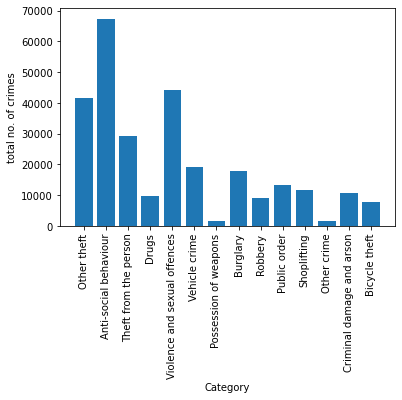

In [15]:
#plot types of crime for the full time period agianst frequency
plt.bar(crimes_ind_DF['Category'], crimes_ind_DF['total no. of crimes'])
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylabel('total no. of crimes')

# Anti-social behaviour crimes over time across London

In [16]:
total_anti_social_bydate = df_anti_social.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_anti_social_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_anti_social_bydate['date'] = total_anti_social_bydate.index        #create another column for the date, called date
total_anti_social_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,549,01/01/2015 12:00:00 AM
01/01/2016 12:00:00 AM,657,01/01/2016 12:00:00 AM
01/01/2017 12:00:00 AM,727,01/01/2017 12:00:00 AM
01/01/2018 12:00:00 AM,731,01/01/2018 12:00:00 AM
01/01/2019 12:00:00 AM,721,01/01/2019 12:00:00 AM
...,...,...
12/01/2016 12:00:00 AM,778,12/01/2016 12:00:00 AM
12/01/2017 12:00:00 AM,613,12/01/2017 12:00:00 AM
12/01/2018 12:00:00 AM,676,12/01/2018 12:00:00 AM


In [17]:
#change the date format in 'Epoch' column
total_anti_social_bydate['date'] = pd.to_datetime(total_anti_social_bydate['date']).dt.date
total_anti_social_bydate['date'] = pd.to_datetime(total_anti_social_bydate['date']).dt.strftime('%d-%m-%Y')
total_anti_social_bydate['date'] = pd.to_datetime(total_anti_social_bydate.date)
total_anti_social_bydate = total_anti_social_bydate.sort_values(by = 'date')
total_anti_social_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,549,2015-01-01
02/01/2015 12:00:00 AM,588,2015-01-02
03/01/2015 12:00:00 AM,632,2015-01-03
04/01/2015 12:00:00 AM,787,2015-01-04
05/01/2015 12:00:00 AM,748,2015-01-05
...,...,...
12/01/2020 12:00:00 AM,991,2020-01-12
01/01/2021 12:00:00 AM,1091,2021-01-01
02/01/2021 12:00:00 AM,1042,2021-01-02


Text(0.5, 1.0, 'anti-social behaviour crimes across London')

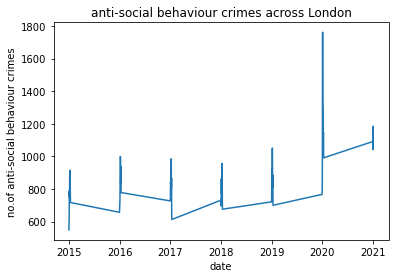

In [18]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_anti_social_bydate['date'], total_anti_social_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of anti-social behaviour crimes")
plt.title("anti-social behaviour crimes across London")

Text(0, 0.5, 'Latitude')

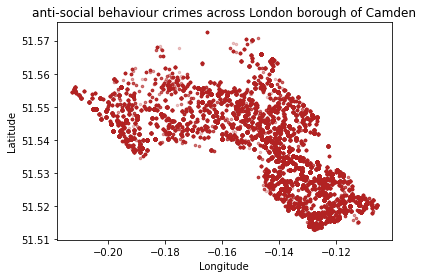

In [19]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_anti_social['Longitude'], df_anti_social['Latitude'], c='firebrick',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('anti-social behaviour crimes across London borough of Camden')
plt.ylabel('Latitude')

# Bike theft over time across London

In [20]:
#collect together all the bike theft crimes, grouping by date
total_bike_theft_bydate = df_bike_theft.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_bike_theft_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_bike_theft_bydate['date'] = total_bike_theft_bydate.index        #create another column for the date, called date
total_bike_theft_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,49,01/01/2015 12:00:00 AM
01/01/2016 12:00:00 AM,65,01/01/2016 12:00:00 AM
01/01/2017 12:00:00 AM,77,01/01/2017 12:00:00 AM
01/01/2018 12:00:00 AM,73,01/01/2018 12:00:00 AM
01/01/2019 12:00:00 AM,95,01/01/2019 12:00:00 AM
...,...,...
12/01/2016 12:00:00 AM,62,12/01/2016 12:00:00 AM
12/01/2017 12:00:00 AM,51,12/01/2017 12:00:00 AM
12/01/2018 12:00:00 AM,81,12/01/2018 12:00:00 AM


In [21]:
#change the date format in 'Epoch' column
total_bike_theft_bydate['date'] = pd.to_datetime(total_bike_theft_bydate['date']).dt.date
total_bike_theft_bydate['date'] = pd.to_datetime(total_bike_theft_bydate['date']).dt.strftime('%d-%m-%Y')
total_bike_theft_bydate['date'] = pd.to_datetime(total_bike_theft_bydate.date)
total_bike_theft_bydate = total_bike_theft_bydate.sort_values(by = 'date')
total_bike_theft_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,49,2015-01-01
02/01/2015 12:00:00 AM,59,2015-01-02
03/01/2015 12:00:00 AM,91,2015-01-03
04/01/2015 12:00:00 AM,71,2015-01-04
05/01/2015 12:00:00 AM,106,2015-01-05
...,...,...
12/01/2020 12:00:00 AM,86,2020-01-12
01/01/2021 12:00:00 AM,70,2021-01-01
02/01/2021 12:00:00 AM,80,2021-01-02


Text(0.5, 1.0, 'bike theft crimes across London')

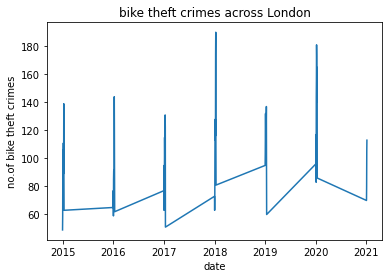

In [22]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_bike_theft_bydate['date'], total_bike_theft_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of bike theft crimes")
plt.title("bike theft crimes across London")

Text(0, 0.5, 'Latitude')

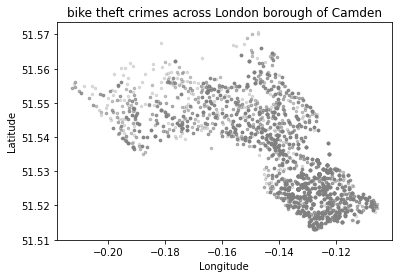

In [23]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_bike_theft['Longitude'], df_bike_theft['Latitude'], c='grey',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('bike theft crimes across London borough of Camden')
plt.ylabel('Latitude')

##Let's test for stationarity in bike theft crimes by starting with the training set

In [24]:
# split the entire df_bike_theft dataframe into training and validation sets
bike_theft_training, bike_theft_validation = data_train_validate(total_bike_theft_bydate)

In [25]:
bike_theft_training

,count,date
Epoch,,
01/01/2015 12:00:00 AM,49,2015-01-01
02/01/2015 12:00:00 AM,59,2015-01-02
03/01/2015 12:00:00 AM,91,2015-01-03
04/01/2015 12:00:00 AM,71,2015-01-04
05/01/2015 12:00:00 AM,106,2015-01-05
06/01/2015 12:00:00 AM,100,2015-01-06
07/01/2015 12:00:00 AM,111,2015-01-07
08/01/2015 12:00:00 AM,89,2015-01-08
09/01/2015 12:00:00 AM,97,2015-01-09


Text(0.5, 1.0, 'bike theft crimes across London')

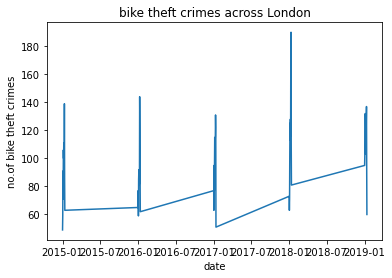

In [26]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(bike_theft_training['date'], bike_theft_training['count'])
plt.xlabel("date")
plt.ylabel("no.of bike theft crimes")
plt.title("bike theft crimes across London")

In [27]:
bike_theft_training.shape, bike_theft_validation.shape

((60, 2), (16, 2))

In [28]:
bike_theft_training = bike_theft_training.rename(columns={'date':'ds','count':'ts'})
bike_theft_training

,ts,ds
Epoch,,
01/01/2015 12:00:00 AM,49,2015-01-01
02/01/2015 12:00:00 AM,59,2015-01-02
03/01/2015 12:00:00 AM,91,2015-01-03
04/01/2015 12:00:00 AM,71,2015-01-04
05/01/2015 12:00:00 AM,106,2015-01-05
06/01/2015 12:00:00 AM,100,2015-01-06
07/01/2015 12:00:00 AM,111,2015-01-07
08/01/2015 12:00:00 AM,89,2015-01-08
09/01/2015 12:00:00 AM,97,2015-01-09


In [29]:
bike_theft_training['ts_log']=log_trans(bike_theft_training,'ts')

##decompose the log of the full signal of training size bike thefts

In [30]:
decomposition = seasonal_decompose(bike_theft_training['ts_log'], period=12, extrapolate_trend=20)

In [31]:
New_Bike_theft_trDF=bike_theft_training
New_Bike_theft_trDF.loc[:,'trend']=decomposition.trend
New_Bike_theft_trDF.loc[:,'seasonal']=decomposition.seasonal
New_Bike_theft_trDF.loc[:,'residuals']=decomposition.resid
New_Bike_theft_trDF

,ts,ds,ts_log,trend,seasonal,residuals
Epoch,,,,,,
01/01/2015 12:00:00 AM,49,2015-01-01,3.891820,4.425295,-0.258928,-0.274547
02/01/2015 12:00:00 AM,59,2015-01-02,4.077537,4.427508,-0.244073,-0.105898
03/01/2015 12:00:00 AM,91,2015-01-03,4.510860,4.429721,-0.079791,0.160930
04/01/2015 12:00:00 AM,71,2015-01-04,4.262680,4.431933,-0.009762,-0.159491
05/01/2015 12:00:00 AM,106,2015-01-05,4.663439,4.434146,0.154048,0.075245
06/01/2015 12:00:00 AM,100,2015-01-06,4.605170,4.436359,0.125965,0.042846
07/01/2015 12:00:00 AM,111,2015-01-07,4.709530,4.454802,0.122702,0.132027
08/01/2015 12:00:00 AM,89,2015-01-08,4.488636,4.477670,0.032324,-0.021358
09/01/2015 12:00:00 AM,97,2015-01-09,4.574711,4.470709,0.277881,-0.173880


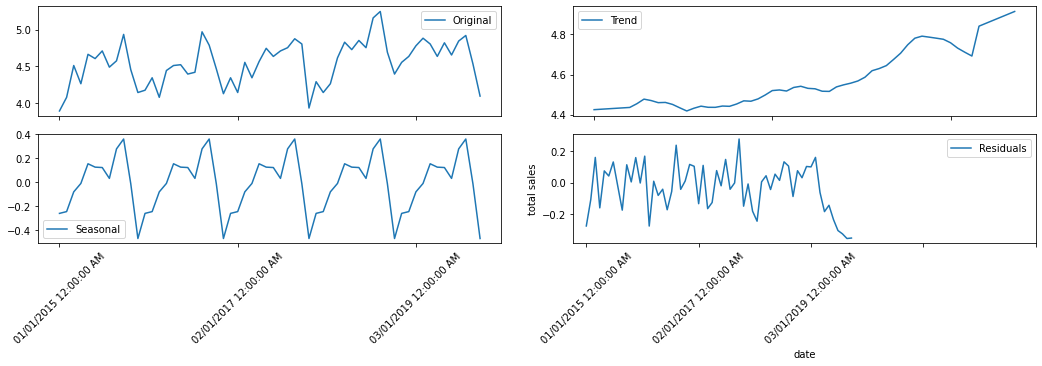

In [48]:
plot_decomposition(New_Bike_theft_trDF,'ts_log',trend='trend', seasonal='seasonal',residual='residuals')

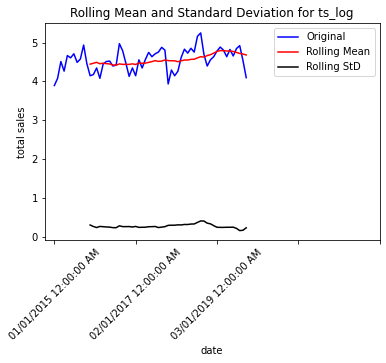

Results:
Test Statistic            -4.362565
p-value                    0.000346
# Lags Used                0.000000
Number of Observations    59.000000
Critical value(1%)        -3.546395
Critical value(5%)        -2.911939
Critical value(10%)       -2.593652
dtype: float64


In [53]:
test_stationary(New_Bike_theft_trDF,'ts_log')

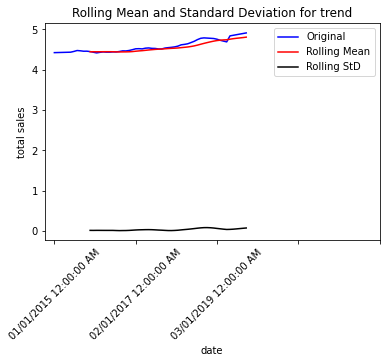

Results:
Test Statistic             1.060906
p-value                    0.994869
# Lags Used                0.000000
Number of Observations    59.000000
Critical value(1%)        -3.546395
Critical value(5%)        -2.911939
Critical value(10%)       -2.593652
dtype: float64


In [54]:
test_stationary(New_Bike_theft_trDF,'trend')

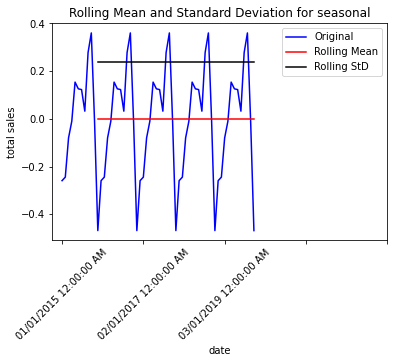

Results:
Test Statistic           -1.727800e+15
p-value                   0.000000e+00
# Lags Used               1.100000e+01
Number of Observations    4.800000e+01
Critical value(1%)       -3.574589e+00
Critical value(5%)       -2.923954e+00
Critical value(10%)      -2.600039e+00
dtype: float64


In [55]:
test_stationary(New_Bike_theft_trDF,'seasonal')

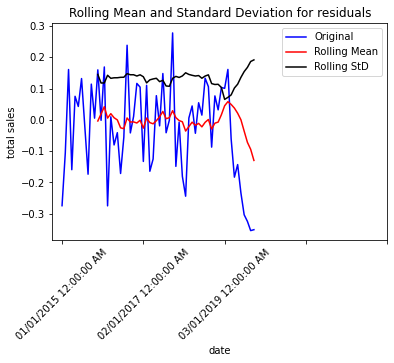

Results:
Test Statistic            -2.137691
p-value                    0.229631
# Lags Used               11.000000
Number of Observations    48.000000
Critical value(1%)        -3.574589
Critical value(5%)        -2.923954
Critical value(10%)       -2.600039
dtype: float64


In [56]:
test_stationary(New_Bike_theft_trDF, 'residuals')

c:\users\vineet sivadasan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\vineet sivadasan\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: 

rmse: 0.2424525672476772


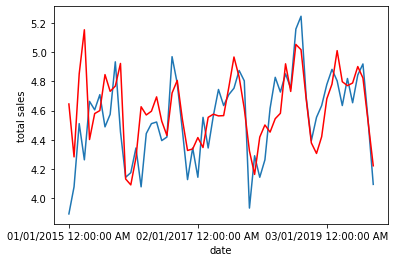

In [57]:
model_AR=run_Arima(df=New_Bike_theft_trDF,ts='ts_log', p=18,d=0,q=0)

In [90]:
model_AR.save('/content/gdrive/MyDrive/Colab Notebooks/ONS_crime/ARIMA_model_forecast_residuals(p=18, freq=12).pkl')

In [91]:
my_forecast = model_AR.forecast(200)

In [92]:
my_forecast[0]

array([4.3294153 , 4.49614107, 4.77654205, 4.79396102, 4.62639369,
       4.61641492, 4.74233269, 4.76282834, 4.88878675, 4.7876056 ,
       4.49775714, 4.2330662 , 4.36912073, 4.60968441, 4.84747809,
       4.80434282, 4.66010322, 4.56608532, 4.73950974, 4.83663234,
       4.87094166, 4.69374215, 4.4111002 , 4.27046477, 4.43787461,
       4.66825285, 4.85659874, 4.78121982, 4.61920528, 4.57021528,
       4.73237826, 4.86291155, 4.85409537, 4.60666664, 4.36819648,
       4.30310807, 4.51143499, 4.7472172 , 4.85369471, 4.74043737,
       4.59152157, 4.578553  , 4.75555865, 4.872878  , 4.80819042,
       4.5467539 , 4.33401358, 4.34742835, 4.58843231, 4.80172433,
       4.8445866 , 4.68975644, 4.5631022 , 4.60053368, 4.78126238,
       4.87161567, 4.75500209, 4.48662069, 4.324444  , 4.40204685,
       4.66126932, 4.84190463, 4.81685764, 4.64215263, 4.54394583,
       4.62727263, 4.81022355, 4.85803474, 4.69608036, 4.43620959,
       4.32985991, 4.46801229, 4.72850109, 4.86082174, 4.77920

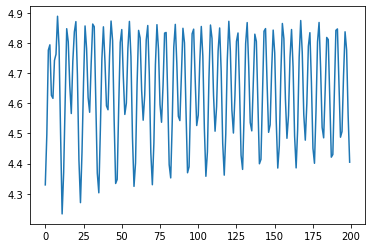

In [93]:
plt.figure()
plt.plot(my_forecast[0])

##Now let's look to forecast on the validation set

In [96]:
bike_theft_validation = bike_theft_validation.rename(columns={'date':'ds','count':'ts'})
bike_theft_validation

,ts,ds
Epoch,,
01/01/2020 12:00:00 AM,96,2020-01-01
02/01/2020 12:00:00 AM,90,2020-02-01
03/01/2020 12:00:00 AM,117,2020-03-01
04/01/2020 12:00:00 AM,83,2020-04-01
05/01/2020 12:00:00 AM,144,2020-05-01
06/01/2020 12:00:00 AM,156,2020-06-01
07/01/2020 12:00:00 AM,181,2020-07-01
08/01/2020 12:00:00 AM,173,2020-08-01
09/01/2020 12:00:00 AM,140,2020-09-01


In [97]:
bike_theft_validation['ts_log']=log_trans(bike_theft_validation,'ts')

##decompose the log of the full signal of validation size bike thefts

In [98]:
decomposition = seasonal_decompose(bike_theft_validation['ts_log'], freq=3, extrapolate_trend=20)

In [99]:
New_Bike_theft_vlDF=bike_theft_validation
New_Bike_theft_vlDF.loc[:,'trend']=decomposition.trend
New_Bike_theft_vlDF.loc[:,'seasonal']=decomposition.seasonal
New_Bike_theft_vlDF.loc[:,'residuals']=decomposition.resid
New_Bike_theft_vlDF

,ts,ds,ts_log,trend,seasonal,residuals
Epoch,,,,,,
01/01/2020 12:00:00 AM,96,2020-01-01,4.564348,4.896271,-0.075227,-0.256695
02/01/2020 12:00:00 AM,90,2020-02-01,4.499810,4.608777,0.059732,-0.168700
03/01/2020 12:00:00 AM,117,2020-03-01,4.762174,4.560275,0.015495,0.186404
04/01/2020 12:00:00 AM,83,2020-04-01,4.418841,4.716943,-0.075227,-0.222875
05/01/2020 12:00:00 AM,144,2020-05-01,4.969813,4.812837,0.059732,0.097244
06/01/2020 12:00:00 AM,156,2020-06-01,5.049856,5.072722,0.015495,-0.038361
07/01/2020 12:00:00 AM,181,2020-07-01,5.198497,5.133882,-0.075227,0.139843
08/01/2020 12:00:00 AM,173,2020-08-01,5.153292,5.097810,0.059732,-0.004251
09/01/2020 12:00:00 AM,140,2020-09-01,4.941642,5.066960,0.015495,-0.140812


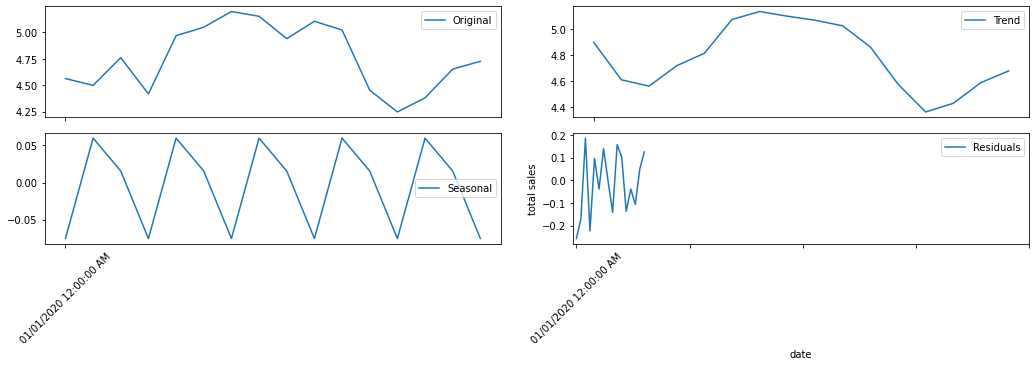

In [47]:
plot_decomposition(New_Bike_theft_vlDF,'ts_log',trend='trend', seasonal='seasonal',residual='residuals')

In [100]:
def test_stationary_val(df, ts):
  #determine Rolling Statistics
  rolmean = df[ts].rolling(window=12, center = False).mean()
  rolstd = df[ts].rolling(window=12, center = False).std()
 
  orig = plt.plot(df[ts],color='blue',label='Original')
  mean = plt.plot(rolmean,color='red', label='Rolling Mean')
  std = plt.plot(rolstd, color='black', label='Rolling StD')
 
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation for %s' %(ts))
  plt.xticks(rotation =45)
  plt.xlabel("date")
  plt.xticks(np.arange(0, 25, step=2))
  plt.ylabel("total sales")
  plt.show(block =False)
  plt.close
 
  #Dickey-Fuller test: Null Hypothesis (H_0): time series is not stationary
  #Alternate Hypothesis(H_1): time series is stationary 
 
 
  print('Results:')
  dftest = adfuller(df[ts],autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index =['Test Statistic','p-value','# Lags Used','Number of Observations'])
 
  for key, value in dftest[4].items():
    dfoutput['Critical value(%s)' %key]= value
 
  print(dfoutput)

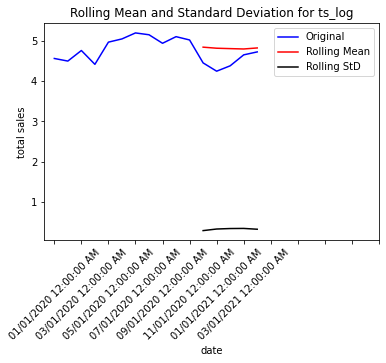

Results:
Test Statistic           -5.222692
p-value                   0.000008
# Lags Used               6.000000
Number of Observations    9.000000
Critical value(1%)       -4.473135
Critical value(5%)       -3.289881
Critical value(10%)      -2.772382
dtype: float64


In [101]:
test_stationary_val(New_Bike_theft_vlDF,'ts_log')

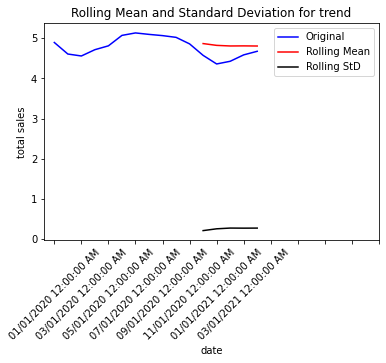

Results:
Test Statistic           -2.955952
p-value                   0.039218
# Lags Used               6.000000
Number of Observations    9.000000
Critical value(1%)       -4.473135
Critical value(5%)       -3.289881
Critical value(10%)      -2.772382
dtype: float64


In [50]:
test_stationary_val(New_Bike_theft_vlDF,'trend')

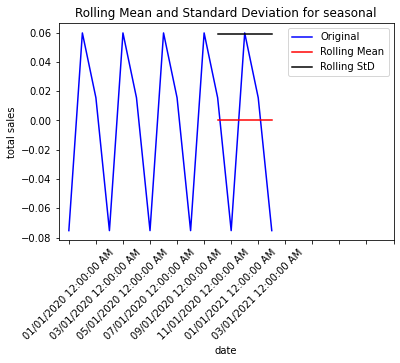

Results:
Test Statistic           -5.359565e+15
p-value                   0.000000e+00
# Lags Used               2.000000e+00
Number of Observations    1.300000e+01
Critical value(1%)       -4.068854e+00
Critical value(5%)       -3.127149e+00
Critical value(10%)      -2.701730e+00
dtype: float64


In [51]:
test_stationary_val(New_Bike_theft_vlDF,'seasonal')

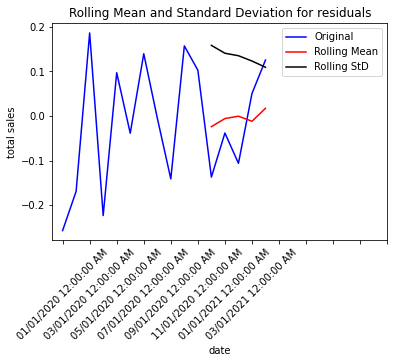

Results:
Test Statistic            -4.666099
p-value                    0.000097
# Lags Used                1.000000
Number of Observations    14.000000
Critical value(1%)        -4.012034
Critical value(5%)        -3.104184
Critical value(10%)       -2.690987
dtype: float64


In [52]:
test_stationary_val(New_Bike_theft_vlDF, 'residuals')

In [102]:
start = len(New_Bike_theft_trDF)
end = len(New_Bike_theft_trDF)+len(New_Bike_theft_vlDF)-1
pred = model_AR.predict(start=start, end=end).rename('ARIMA Predictions')
pred_DF = pd.DataFrame(pred)
pred_DF['Date']=pred_DF.index

In [103]:
pred_DF #ARIMA forecasts of bike theft

,ARIMA Predictions,Date
2020-01-01,4.329415,2020-01-01
2020-02-01,4.496141,2020-02-01
2020-03-01,4.776542,2020-03-01
2020-04-01,4.793961,2020-04-01
2020-05-01,4.626394,2020-05-01
2020-06-01,4.616415,2020-06-01
2020-07-01,4.742333,2020-07-01
2020-08-01,4.762828,2020-08-01
2020-09-01,4.888787,2020-09-01
2020-10-01,4.787606,2020-10-01


In [104]:
New_Bike_theft_vlDF

,ts,ds,ts_log,trend,seasonal,residuals
Epoch,,,,,,
01/01/2020 12:00:00 AM,96,2020-01-01,4.564348,4.896271,-0.075227,-0.256695
02/01/2020 12:00:00 AM,90,2020-02-01,4.499810,4.608777,0.059732,-0.168700
03/01/2020 12:00:00 AM,117,2020-03-01,4.762174,4.560275,0.015495,0.186404
04/01/2020 12:00:00 AM,83,2020-04-01,4.418841,4.716943,-0.075227,-0.222875
05/01/2020 12:00:00 AM,144,2020-05-01,4.969813,4.812837,0.059732,0.097244
06/01/2020 12:00:00 AM,156,2020-06-01,5.049856,5.072722,0.015495,-0.038361
07/01/2020 12:00:00 AM,181,2020-07-01,5.198497,5.133882,-0.075227,0.139843
08/01/2020 12:00:00 AM,173,2020-08-01,5.153292,5.097810,0.059732,-0.004251
09/01/2020 12:00:00 AM,140,2020-09-01,4.941642,5.066960,0.015495,-0.140812


In [105]:
New_vlDF_ts_DF = New_Bike_theft_vlDF.drop(['ts',    'trend',    'seasonal', 'residuals'], axis=1)

In [106]:
New_vlDF_ts_DF

,ds,ts_log
Epoch,,
01/01/2020 12:00:00 AM,2020-01-01,4.564348
02/01/2020 12:00:00 AM,2020-02-01,4.499810
03/01/2020 12:00:00 AM,2020-03-01,4.762174
04/01/2020 12:00:00 AM,2020-04-01,4.418841
05/01/2020 12:00:00 AM,2020-05-01,4.969813
06/01/2020 12:00:00 AM,2020-06-01,5.049856
07/01/2020 12:00:00 AM,2020-07-01,5.198497
08/01/2020 12:00:00 AM,2020-08-01,5.153292
09/01/2020 12:00:00 AM,2020-09-01,4.941642


In [108]:
from datetime import date, timedelta
 
sdate = '2020-01-01'
edate = '2021-04-01'
date_list = pd.date_range(sdate, edate, periods=16).tolist()

Text(0, 0.5, "'noise' of no. of bike thefts")

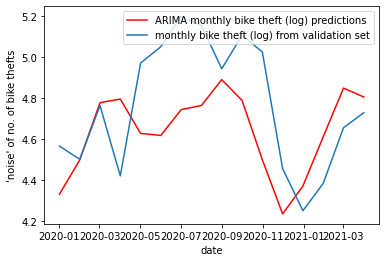

In [109]:
plot_1, = plt.plot(date_list, pred_DF['ARIMA Predictions'], color='red', label ='ARIMA monthly bike theft (log) predictions')
plot_2, = plt.plot(date_list, New_vlDF_ts_DF['ts_log'], label ='monthly bike theft (log) from validation set')
plt.legend(handles=[plot_1, plot_2])
plt.xlabel("date")
plt.ylabel("'noise' of no. of bike thefts")
#plt.ylim([-0.3, 0.3])

In [112]:
# rmse error on weekly sales residuals based on 29 week validation set using 114 week training set
rss = sum((pred_DF['ARIMA Predictions']-New_vlDF_ts_DF['ts_log'])**2)
rmse=np.sqrt(rss/len(New_vlDF_ts_DF['ts_log']))
print('rmse:',rmse)

rmse: 0.2960299022768931


# Burglary over time across London

In [ ]:
total_burglary_bydate = df_burglary.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_burglary_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_burglary_bydate['date'] = total_burglary_bydate.index        #create another column for the date, called date
total_burglary_bydate

In [ ]:
#change the date format in 'Epoch' column
total_burglary_bydate['date'] = pd.to_datetime(total_burglary_bydate['date']).dt.date
total_burglary_bydate['date'] = pd.to_datetime(total_burglary_bydate['date']).dt.strftime('%d-%m-%Y')
total_burglary_bydate['date'] = pd.to_datetime(total_burglary_bydate.date)
total_burglary_bydate = total_burglary_bydate.sort_values(by = 'date')
total_burglary_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_burglary_bydate['date'], total_burglary_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of burglary crimes")
plt.title("burglary crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_burglary['Longitude'], df_burglary['Latitude'], c='peru',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('Burglary crimes across London borough of Camden')
plt.ylabel('Latitude')

# Criminal damage and arson over time across London

In [ ]:
total_arson_bydate = df_arson.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_arson_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_arson_bydate['date'] = total_arson_bydate.index        #create another column for the date, called date
total_arson_bydate

In [ ]:
#change the date format in 'Epoch' column
total_arson_bydate['date'] = pd.to_datetime(total_arson_bydate['date']).dt.date
total_arson_bydate['date'] = pd.to_datetime(total_arson_bydate['date']).dt.strftime('%d-%m-%Y')
total_arson_bydate['date'] = pd.to_datetime(total_arson_bydate.date)
total_arson_bydate = total_arson_bydate.sort_values(by = 'date')
total_arson_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_arson_bydate['date'], total_arson_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of criminal damage and arson crimes")
plt.title("criminal damage and arson crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_arson['Longitude'], df_arson['Latitude'], c='gold',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('Criminal damage and arson across London borough of Camden')
plt.ylabel('Latitude')

# Drug crimes over time across London

In [ ]:
total_drugs_bydate = df_drugs.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_drugs_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_drugs_bydate['date'] = total_drugs_bydate.index        #create another column for the date, called date
total_drugs_bydate

In [ ]:
#change the date format in 'Epoch' column
total_drugs_bydate['date'] = pd.to_datetime(total_drugs_bydate['date']).dt.date
total_drugs_bydate['date'] = pd.to_datetime(total_drugs_bydate['date']).dt.strftime('%d-%m-%Y')
total_drugs_bydate['date'] = pd.to_datetime(total_drugs_bydate.date)
total_drugs_bydate = total_drugs_bydate.sort_values(by = 'date')
total_drugs_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_drugs_bydate['date'], total_drugs_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of drug crimes")
plt.title("drug crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_drugs['Longitude'], df_drugs['Latitude'], c='darkorange',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('drug crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Other crimes over time across London

In [ ]:
total_other_crime_bydate = df_other_crime.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_other_crime_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_other_crime_bydate['date'] = total_other_crime_bydate.index        #create another column for the date, called date
total_other_crime_bydate

In [ ]:
#change the date format in 'Epoch' column
total_other_crime_bydate['date'] = pd.to_datetime(total_other_crime_bydate['date']).dt.date
total_other_crime_bydate['date'] = pd.to_datetime(total_other_crime_bydate['date']).dt.strftime('%d-%m-%Y')
total_other_crime_bydate['date'] = pd.to_datetime(total_other_crime_bydate.date)
total_other_crime_bydate = total_other_crime_bydate.sort_values(by = 'date')
total_other_crime_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_other_crime_bydate['date'], total_other_crime_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of other crimes")
plt.title("other crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_other_crime['Longitude'], df_other_crime['Latitude'], c='green',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('other crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Other theft over time across London


In [ ]:
total_other_theft_bydate = df_other_theft.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_other_theft_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_other_theft_bydate['date'] = total_other_theft_bydate.index        #create another column for the date, called date
total_other_theft_bydate

In [ ]:
#change the date format in 'Epoch' column
total_other_theft_bydate['date'] = pd.to_datetime(total_other_theft_bydate['date']).dt.date
total_other_theft_bydate['date'] = pd.to_datetime(total_other_theft_bydate['date']).dt.strftime('%d-%m-%Y')
total_other_theft_bydate['date'] = pd.to_datetime(total_other_theft_bydate.date)
total_other_theft_bydate = total_other_theft_bydate.sort_values(by = 'date')
total_other_theft_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_other_theft_bydate['date'], total_other_theft_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of other theft crimes")
plt.title("other theft crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_other_theft['Longitude'], df_other_theft['Latitude'], c='lightseagreen',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('other theft crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Possession of weapons crimes over time across London


In [ ]:
total_weapons_bydate = df_weapons.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_weapons_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_weapons_bydate['date'] = total_weapons_bydate.index        #create another column for the date, called date
total_weapons_bydate

In [ ]:
#change the date format in 'Epoch' column
total_weapons_bydate['date'] = pd.to_datetime(total_weapons_bydate['date']).dt.date
total_weapons_bydate['date'] = pd.to_datetime(total_weapons_bydate['date']).dt.strftime('%d-%m-%Y')
total_weapons_bydate['date'] = pd.to_datetime(total_weapons_bydate.date)
total_weapons_bydate = total_weapons_bydate.sort_values(by = 'date')
total_weapons_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_weapons_bydate['date'], total_weapons_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of weapons possession crimes")
plt.title("weapons possession crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_weapons['Longitude'], df_weapons['Latitude'], c='dodgerblue',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('weapons possession crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Public order crimes over time across London

In [ ]:
total_pub_order_bydate = df_pub_order.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_pub_order_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_pub_order_bydate['date'] = total_pub_order_bydate.index        #create another column for the date, called date
total_pub_order_bydate

In [ ]:
#change the date format in 'Epoch' column
total_pub_order_bydate['date'] = pd.to_datetime(total_pub_order_bydate['date']).dt.date
total_pub_order_bydate['date'] = pd.to_datetime(total_pub_order_bydate['date']).dt.strftime('%d-%m-%Y')
total_pub_order_bydate['date'] = pd.to_datetime(total_pub_order_bydate.date)
total_pub_order_bydate = total_pub_order_bydate.sort_values(by = 'date')
total_pub_order_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_pub_order_bydate['date'], total_pub_order_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of public order crimes")
plt.title("public order crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_pub_order['Longitude'], df_pub_order['Latitude'], c='lightgreen',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('public order crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Robbery crimes over time across London

In [ ]:
total_robbery_bydate = df_robbery.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_robbery_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_robbery_bydate['date'] = total_robbery_bydate.index        #create another column for the date, called date
total_robbery_bydate

In [ ]:
#change the date format in 'Epoch' column
total_robbery_bydate['date'] = pd.to_datetime(total_robbery_bydate['date']).dt.date
total_robbery_bydate['date'] = pd.to_datetime(total_robbery_bydate['date']).dt.strftime('%d-%m-%Y')
total_robbery_bydate['date'] = pd.to_datetime(total_robbery_bydate.date)
total_robbery_bydate = total_robbery_bydate.sort_values(by = 'date')
total_robbery_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_robbery_bydate['date'], total_robbery_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of robbery crimes")
plt.title("robbery crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_robbery['Longitude'], df_robbery['Latitude'], c='palevioletred',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('robbery crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Shoplifting crimes over time across London

In [ ]:
total_shoplifting_bydate = df_shoplifting.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_shoplifting_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_shoplifting_bydate['date'] = total_shoplifting_bydate.index        #create another column for the date, called date
total_shoplifting_bydate

In [ ]:
#change the date format in 'Epoch' column
total_shoplifting_bydate['date'] = pd.to_datetime(total_shoplifting_bydate['date']).dt.date
total_shoplifting_bydate['date'] = pd.to_datetime(total_shoplifting_bydate['date']).dt.strftime('%d-%m-%Y')
total_shoplifting_bydate['date'] = pd.to_datetime(total_shoplifting_bydate.date)
total_shoplifting_bydate = total_shoplifting_bydate.sort_values(by = 'date')
total_shoplifting_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_shoplifting_bydate['date'], total_shoplifting_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of shoplifting crimes")
plt.title("shoplifting crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_shoplifting['Longitude'], df_shoplifting['Latitude'], c='purple',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('shoplifting crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Muggings over time across London

In [ ]:
total_mugging_bydate = df_mugging.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_mugging_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_mugging_bydate['date'] = total_mugging_bydate.index        #create another column for the date, called date
total_mugging_bydate

In [ ]:
#change the date format in 'Epoch' column
total_mugging_bydate['date'] = pd.to_datetime(total_mugging_bydate['date']).dt.date
total_mugging_bydate['date'] = pd.to_datetime(total_mugging_bydate['date']).dt.strftime('%d-%m-%Y')
total_mugging_bydate['date'] = pd.to_datetime(total_mugging_bydate.date)
total_mugging_bydate = total_mugging_bydate.sort_values(by = 'date')
total_mugging_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_mugging_bydate['date'], total_mugging_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of muggings")
plt.title("muggings across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_mugging['Longitude'], df_mugging['Latitude'], c='mediumslateblue',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('mugging crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Vehicle crime over time across London

In [ ]:
total_vehicle_bydate = df_vehicle.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_vehicle_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_vehicle_bydate['date'] = total_vehicle_bydate.index        #create another column for the date, called date
total_vehicle_bydate

In [ ]:
#change the date format in 'Epoch' column
total_vehicle_bydate['date'] = pd.to_datetime(total_vehicle_bydate['date']).dt.date
total_vehicle_bydate['date'] = pd.to_datetime(total_vehicle_bydate['date']).dt.strftime('%d-%m-%Y')
total_vehicle_bydate['date'] = pd.to_datetime(total_vehicle_bydate.date)
total_vehicle_bydate = total_vehicle_bydate.sort_values(by = 'date')
total_vehicle_bydate

In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_vehicle_bydate['date'], total_vehicle_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of vehicle crimes")
plt.title("vehicle crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_vehicle['Longitude'], df_vehicle['Latitude'], c='blue',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('vehicle crimes across London borough of Camden' )
plt.ylabel('Latitude')

# Violence and sexual offences crimes over time across London

In [113]:
total_viol_sex_bydate = df_viol_sex.groupby(['Epoch']).sum()      #sum 'count' number of crimes by date
total_viol_sex_bydate.drop(['Street ID', 'ID', 'Easting', 'Northing', 'Longitude','Latitude', 'Context'], axis=1, inplace=True)     #remove all other columns
total_viol_sex_bydate['date'] = total_viol_sex_bydate.index        #create another column for the date, called date
total_viol_sex_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,459,01/01/2015 12:00:00 AM
01/01/2016 12:00:00 AM,569,01/01/2016 12:00:00 AM
01/01/2017 12:00:00 AM,469,01/01/2017 12:00:00 AM
01/01/2018 12:00:00 AM,612,01/01/2018 12:00:00 AM
01/01/2019 12:00:00 AM,575,01/01/2019 12:00:00 AM
...,...,...
12/01/2016 12:00:00 AM,587,12/01/2016 12:00:00 AM
12/01/2017 12:00:00 AM,582,12/01/2017 12:00:00 AM
12/01/2018 12:00:00 AM,635,12/01/2018 12:00:00 AM


In [114]:
#change the date format in 'Epoch' column
total_viol_sex_bydate['date'] = pd.to_datetime(total_viol_sex_bydate['date']).dt.date
total_viol_sex_bydate['date'] = pd.to_datetime(total_viol_sex_bydate['date']).dt.strftime('%d-%m-%Y')
total_viol_sex_bydate['date'] = pd.to_datetime(total_viol_sex_bydate.date)
total_viol_sex_bydate = total_viol_sex_bydate.sort_values(by = 'date')
total_viol_sex_bydate

,count,date
Epoch,,
01/01/2015 12:00:00 AM,459,2015-01-01
02/01/2015 12:00:00 AM,458,2015-01-02
03/01/2015 12:00:00 AM,511,2015-01-03
04/01/2015 12:00:00 AM,476,2015-01-04
05/01/2015 12:00:00 AM,504,2015-01-05
...,...,...
12/01/2020 12:00:00 AM,505,2020-01-12
01/01/2021 12:00:00 AM,427,2021-01-01
02/01/2021 12:00:00 AM,418,2021-01-02


In [ ]:
# plot the total number of crimes committed in London over the full 7 year period given in the dataset
plt.figure()
plt.plot(total_viol_sex_bydate['date'], total_viol_sex_bydate['count'])
plt.xlabel("date")
plt.ylabel("no.of violence and sexual offences crimes")
plt.title("violence and sexual offences crimes across London")

In [ ]:
#plot of locations of the crimes, colour coded by crime category
plt.scatter(df_viol_sex['Longitude'], df_viol_sex['Latitude'], c='teal',  s=6,  alpha=0.25)
plt.xlabel('Longitude')
plt.title('violence and sexual assualt across London borough of Camden' )
plt.ylabel('Latitude')